In [1]:
from __future__ import print_function

# Importing the Dataset

In [2]:
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

# linear regression feature importance
from sklearn.datasets import make_regression

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
yellow_trip_df = pd.read_csv('Yellow_tripdata_2019-10.csv')

In [4]:
yellow_trip_df
pd.set_option('display.max_columns', 50)

In [5]:
yellow_trip_df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             1.0  2019-10-01 00:19:55   2019-10-01 00:23:57              1.0   
1             1.0  2019-10-01 00:40:19   2019-10-01 00:55:17              2.0   
2             1.0  2019-10-01 00:06:52   2019-10-01 00:21:23              1.0   
3             2.0  2019-10-01 00:36:08   2019-10-01 00:36:15              1.0   
4             2.0  2019-10-01 00:36:08   2019-10-01 00:36:15              1.0   
...           ...                  ...                   ...              ...   
7213886       NaN  2019-10-31 23:20:00   2019-10-31 23:56:00              NaN   
7213887       NaN  2019-10-31 23:42:00   2019-11-01 00:07:00              NaN   
7213888       NaN  2019-10-31 23:50:35   2019-11-01 00:08:45              NaN   
7213889       NaN  2019-10-31 23:29:26   2019-10-31 23:59:15              NaN   
7213890       NaN  2019-10-31 23:52:00   2019-11-01 00:39:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.40         1.0                  N            48   
1                 4.30         1.0                  N           144   
2                 5.00         1.0                  N           137   
3                 0.00         1.0                  N            25   
4                 0.00         1.0                  N            25   
...                ...         ...                ...           ...   
7213886          19.53         NaN                NaN            77   
7213887           4.96         NaN                NaN           238   
7213888           4.63         NaN                NaN           186   
7213889          17.49         NaN                NaN            45   
7213890          15.97         NaN                NaN           140   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 163           2.0         4.50   3.00      0.5         0.0   
1                 141           1.0        14.50   3.00      0.5         2.0   
2                  80           1.0        17.00   3.00      0.5         5.2   
3                  25           4.0        -2.50  -0.50     -0.5         0.0   
4                  25           2.0         2.50   0.50      0.5         0.0   
...               ...           ...          ...    ...      ...         ...   
7213886           119           NaN        63.83   2.75      0.5         0.0   
7213887           137           NaN        28.95   2.75      0.5         0.0   
7213888           166           NaN        29.26   2.75      0.0         0.0   
7213889           122           NaN        54.25   2.75      0.0         0.0   
7213890            91           NaN        39.62   2.75      0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
0                0.00                    0.3          8.30   
1                0.00                    0.3         20.30   
2                0.00                    0.3         26.00   
3                0.00                   -0.3         -3.80   
4                0.00                    0.3          3.80   
...               ...                    ...           ...   
7213886          6.12                    0.3         73.50   
7213887          0.00                    0.3         32.50   
7213888          0.00                    0.3         32.31   
7213889          6.12                    0.3         63.42   
7213890          6.12                    0.3         49.29   

         congestion_surcharge  
0                         2.5  
1                         2.5  
2                         2.5  
3                         0.0  
4                         0.0  
...                       ...  
7213886                   0.0  
7213887                   0.0  
7213888                   0.0  
7213889                   0.0  
7213890                   0.0  

[7213891 rows x 18 columns]

In [6]:
#taxi_zone_cord = pd.read_csv('taxi_zone_lookup_coordinates.csv')

In [7]:
#taxi_zone_cord

In [8]:
#taxi_zone_df = pd.read_csv('taxi+_zone_lookup.csv')

In [9]:
#taxi_zone_df

In [10]:
#yellow_trip_df['LocationID']=yellow_trip_df['PULocationID']

In [11]:
#yellow_trip_df

In [12]:
#xxx=pd.merge(yellow_trip_df,taxi_zone_cord,on='LocationID')

In [13]:
#xxx

In [14]:
#xxx.rename(columns={'latitude':'PUlatitude','longitude':'PUlogtitude'})

## Add all coordinates for DOlocation Zone

In [15]:
#taxi_zone_cord['LocationID1']=taxi_zone_cord['LocationID']

In [16]:
#taxi_zone_cord

In [17]:
#yellow_trip_df['LocationID1']=yellow_trip_df['DOLocationID']

In [18]:
#xxx.merge(yellow_trip_df,taxi_zone_cord,on='LocationID1')

In [19]:
#xxx['DOlatitude'] = xxx.groupby('PULocationID')['PUlatitude'].sort_values(ascending=False)
#xxx['DOlatitude']

# Exploring Yellow Trips Data

## Understanding each feature seperately

In [20]:
#Show 5 observation randomly
yellow_trip_df.sample(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
70155         2.0  2019-10-01 12:01:04   2019-10-01 12:17:17              2.0   
3438992       1.0  2019-10-16 09:07:55   2019-10-16 09:13:48              1.0   
1646853       1.0  2019-10-08 09:34:18   2019-10-08 09:40:40              1.0   
3008395       2.0  2019-10-14 09:06:46   2019-10-14 09:19:25              2.0   
1442338       2.0  2019-10-07 10:09:25   2019-10-07 10:19:47              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
70155             1.35         1.0                  N           186   
3438992           1.10         1.0                  N           264   
1646853           0.70         1.0                  N            43   
3008395           2.12         1.0                  N           163   
1442338           2.08         1.0                  N           249   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
70155             142           2.0         11.0    0.0      0.5        0.00   
3438992           140           2.0          6.0    2.5      0.5        0.00   
1646853           237           1.0          6.0    2.5      0.5        1.00   
3008395            68           1.0         10.5    0.0      0.5        2.07   
1442338            13           1.0          9.5    0.0      0.5        2.56   

         tolls_amount  improvement_surcharge  total_amount  \
70155             0.0                    0.3         14.30   
3438992           0.0                    0.3          9.30   
1646853           0.0                    0.3         10.30   
3008395           0.0                    0.3         15.87   
1442338           0.0                    0.3         15.36   

         congestion_surcharge  
70155                     2.5  
3438992                   2.5  
1646853                   2.5  
3008395                   2.5  
1442338                   2.5

In [21]:
#Inspect in each feature uniqely variables
yellow_trip_df.apply(pd.Series.nunique)

VendorID                       2
tpep_pickup_datetime     2218590
tpep_dropoff_datetime    2221573
passenger_count               10
trip_distance               4555
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 260
DOLocationID                 261
payment_type                   4
fare_amount                 5396
extra                         48
mta_tax                        9
tip_amount                  3809
tolls_amount                1068
improvement_surcharge          3
total_amount               12652
congestion_surcharge           6
dtype: int64

## Diving deeper to gain insights and each Feature that has less than 10 entries

### 1- VendorID
A code indicating the TPEP provider that provided the record. 

1= Creative Mobile Technologies, LLC;

2= VeriFone Inc.

In [22]:
yellow_trip_df['VendorID'].unique()                  

array([ 1.,  2., nan])

### 2- tpep_pickup_datetime     
contains pickup date and time and dtype object, this will be explored further below.

### 3- tpep_dropoff_datetime
contains dropoff date and time and dtype object, this will be explored further below.

### 4- passenger_count                

 The elapsed trip distance in miles reported by the taximeter

In [23]:
yellow_trip_df['passenger_count'].value_counts()                  

1.0    5063866
2.0    1096061
3.0     296540
5.0     272184
6.0     159337
4.0     141524
0.0     137577
7.0         38
8.0         25
9.0         16
Name: passenger_count, dtype: int64

There is only one trip with 9 passengers count.
Most of trips have only one passenger.

### 5- RateCodeID:
The final rate code in effect at the end of the trip.

1= Standard rate

2=JFK

3=Newark

4=Nassau or Westchester

5=Negotiated fare

6=Group ride

In [24]:
yellow_trip_df['RatecodeID'].unique()

array([ 1.,  5.,  3.,  2.,  4., 99.,  6., nan])

We have only 6 rate code effect at the end of trips which effect also on the fare amount but there is 99. 
we will check it in the training set later to get more info abt it 

### 6-  Store and fwd flag:
This flag indicates whether the trip record was held in vehicle 
memory before sending to the vendor, aka “store and forward,” 
because the vehicle did not have a connection to the server.

Y= store and forward trip

N= not a store and forward trip

In [25]:
yellow_trip_df['store_and_fwd_flag'].unique() 

array(['N', 'Y', nan], dtype=object)

### 7- PULocationID  
TLC Taxi Zone in which the taximeter was engaged

### 8- DOLocationID                 
TLC Taxi Zone in which the taximeter was disengaged

 
### 9-  payment_type:
A numeric code signifying how the passenger paid for the trip. 

1= Credit card

2= Cash

3= No charge

4= Dispute

5= Unknown

6= Voided trip


In [26]:
yellow_trip_df['payment_type'].unique() 

array([ 2.,  1.,  4.,  3., nan])

In [27]:
yellow_trip_df.payment_type.value_counts()

1.0    5215874
2.0    1893584
3.0      39791
4.0      17919
Name: payment_type, dtype: int64

### Show the differences btween these prices and how they effects on the trips's prices

### 10-  Fare_amount:
The time-and-distance fare calculated by the meter 

### 11-  Extra: 
Miscellaneous extras and surcharges. Currently, this only includes
the $0.50 and $1 rush hour and overnight charges

### 12-  mta_tax:
$0.50 MTA tax that is automatically triggered based on the metered 
rate in use.

### 13- tip_amount:
Tip amount – This field is automatically populated for credit card 
tips. Cash tips are not included.

### 14- tolls_amount
Total amount of all tolls paid in trip

### 15- improvement_surcharge:
$0.30 improvement surcharge assessed trips at the flag drop. The 
improvement surcharge began being levied in 2015.

### 16- total amount:
The total amount charged to passengers. Does not include cash tips.

### 17- congestion_surcharge:
On January 1st 2019, New York State’s congestion surcharge will take effect. As a result, trips in taxis and For-Hire Vehicles will be charged a surcharge for trips that start, end or pass through Congestion Zone. The Congestion Zone is Manhattan, south of 96th Street 

### Congestion Surcharge :

$2.50 for non-shared trips in taxicabs

$2.75 for non-shared trips in For-Hire-Vehicles, including limousines, and Street-Hail Liveries (Green Taxis)

OR

$0.75 for shared-rides in any type of vehicle

No surcharge for Access-A-Ride, or any other MTA dispatched trip.


In [28]:
yellow_trip_df['congestion_surcharge'].unique()  #رسوم الازدحام                                                      

array([ 2.5 ,  0.  , -2.5 ,  0.75,  2.75,  0.3 ])

In [29]:
yellow_trip_df['congestion_surcharge'].unique

<bound method Series.unique of 0          2.5
1          2.5
2          2.5
3          0.0
4          0.0
          ... 
7213886    0.0
7213887    0.0
7213888    0.0
7213889    0.0
7213890    0.0
Name: congestion_surcharge, Length: 7213891, dtype: float64>

In [30]:
# $0.50 MTA tax that is automatically triggered based on the metered rate in use.
yellow_trip_df['mta_tax'].unique()                         

array([ 0.5 , -0.5 ,  0.  ,  3.3 ,  0.35, 19.42,  0.25,  1.1 , 60.  ])

In [31]:
# The number of passengers in the vehicle. This is a driver-entered value.
yellow_trip_df['improvement_surcharge'].unique()                  

array([ 0.3, -0.3,  0. ])

## Creating some new important  features

In [32]:
# convert the type of 'tpep_pickup_datetime' & 'tpep_dropoff_datetime' to DateTime Type
yellow_trip_df['tpep_pickup_datetime']=pd.to_datetime(yellow_trip_df['tpep_pickup_datetime'])
yellow_trip_df['tpep_dropoff_datetime']=pd.to_datetime(yellow_trip_df['tpep_dropoff_datetime'])

In [33]:
#Now, extract and create a new feature 'Day' & 'Hour' from the above two coulmns,Monday=0 and Sunday=6
yellow_trip_df['pickup_day_num']=yellow_trip_df['tpep_pickup_datetime'].dt.weekday
yellow_trip_df['dropoff_day_num']=yellow_trip_df['tpep_dropoff_datetime'].dt.weekday
yellow_trip_df['pickup_day_30']=yellow_trip_df['tpep_pickup_datetime'].dt.day
yellow_trip_df['dropoff_day_30']=yellow_trip_df['tpep_dropoff_datetime'].dt.day


In [34]:
yellow_trip_df.sample(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
30523         2.0  2019-10-01 08:57:41   2019-10-01 09:07:46              1.0   
4541152       2.0  2019-10-20 17:18:58   2019-10-20 17:34:04              1.0   
6509219       2.0  2019-10-29 10:57:47   2019-10-29 11:21:25              1.0   
362756        1.0  2019-10-02 17:30:22   2019-10-02 17:52:39              1.0   
2888371       2.0  2019-10-13 15:24:40   2019-10-13 15:48:41              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
30523             1.04         1.0                  N            68   
4541152           2.22         1.0                  N           186   
6509219           1.71         1.0                  N           162   
362756            3.20         1.0                  N            68   
2888371           7.36         1.0                  N           138   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
30523             164           1.0          7.5    0.0      0.5        2.16   
4541152            79           1.0         11.5    0.0      0.5        0.74   
6509219           186           1.0         14.5    0.0      0.5        3.56   
362756            141           2.0         16.0    3.5      0.5        0.00   
2888371            36           1.0         25.5    0.0      0.5        5.26   

         tolls_amount  improvement_surcharge  total_amount  \
30523             0.0                    0.3         12.96   
4541152           0.0                    0.3         15.54   
6509219           0.0                    0.3         21.36   
362756            0.0                    0.3         20.30   
2888371           0.0                    0.3         31.56   

         congestion_surcharge  pickup_day_num  dropoff_day_num  pickup_day_30  \
30523                     2.5               1                1              1   
4541152                   2.5               6                6             20   
6509219                   2.5               1                1             29   
362756                    2.5               2                2              2   
2888371                   0.0               6                6             13   

         dropoff_day_30  
30523                 1  
4541152              20  
6509219              29  
362756                2  
2888371              13

In [35]:
# Also extract and create another feature 'Hour'in the 24-hour format., from 'tpep_pickup_datetime' & 'tpep_pickup_datetime'  
yellow_trip_df['pickup_hour']=yellow_trip_df['tpep_pickup_datetime'].dt.hour
yellow_trip_df['dropoff_hour']=yellow_trip_df['tpep_dropoff_datetime'].dt.hour

In [36]:
yellow_trip_df.tail()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
7213886       NaN  2019-10-31 23:20:00   2019-10-31 23:56:00              NaN   
7213887       NaN  2019-10-31 23:42:00   2019-11-01 00:07:00              NaN   
7213888       NaN  2019-10-31 23:50:35   2019-11-01 00:08:45              NaN   
7213889       NaN  2019-10-31 23:29:26   2019-10-31 23:59:15              NaN   
7213890       NaN  2019-10-31 23:52:00   2019-11-01 00:39:00              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
7213886          19.53         NaN                NaN            77   
7213887           4.96         NaN                NaN           238   
7213888           4.63         NaN                NaN           186   
7213889          17.49         NaN                NaN            45   
7213890          15.97         NaN                NaN           140   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
7213886           119           NaN        63.83   2.75      0.5         0.0   
7213887           137           NaN        28.95   2.75      0.5         0.0   
7213888           166           NaN        29.26   2.75      0.0         0.0   
7213889           122           NaN        54.25   2.75      0.0         0.0   
7213890            91           NaN        39.62   2.75      0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
7213886          6.12                    0.3         73.50   
7213887          0.00                    0.3         32.50   
7213888          0.00                    0.3         32.31   
7213889          6.12                    0.3         63.42   
7213890          6.12                    0.3         49.29   

         congestion_surcharge  pickup_day_num  dropoff_day_num  pickup_day_30  \
7213886                   0.0               3                3             31   
7213887                   0.0               3                4             31   
7213888                   0.0               3                4             31   
7213889                   0.0               3                3             31   
7213890                   0.0               3                4             31   

         dropoff_day_30  pickup_hour  dropoff_hour  
7213886              31           23            23  
7213887               1           23             0  
7213888               1           23             0  
7213889              31           23            23  
7213890               1           23             0

### Polynomial Features:
to improve our features and the for  of our hypothesis function by combining multiple features into one. 
so i think this feature the most significant target that i'll used later to predict the trip duration.

In [37]:
yellow_trip_df['trip_duration'] = (yellow_trip_df['tpep_dropoff_datetime'] - yellow_trip_df['tpep_pickup_datetime']).dt.total_seconds()/60
yellow_trip_df.sample(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1748626       2.0  2019-10-08 17:11:14   2019-10-08 17:15:48              1.0   
884094        1.0  2019-10-04 19:47:15   2019-10-04 20:01:58              2.0   
3356151       2.0  2019-10-15 21:56:46   2019-10-15 22:01:44              1.0   
3983418       1.0  2019-10-18 12:05:24   2019-10-18 12:56:01              1.0   
6186896       2.0  2019-10-27 17:38:00   2019-10-27 18:21:11              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1748626           0.69         1.0                  N           230   
884094            3.70         1.0                  N           260   
3356151           0.97         1.0                  N           229   
3983418           3.40         1.0                  N           141   
6186896          20.26         3.0                  N           142   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
1748626            48           2.0          5.0    1.0      0.5        0.00   
884094             95           2.0         14.0    0.5      0.5        0.00   
3356151           162           1.0          5.0    0.5      0.5        1.76   
3983418           186           1.0         29.5    2.5      0.5        6.55   
6186896             1           1.0         75.5    0.0      0.0        0.00   

         tolls_amount  improvement_surcharge  total_amount  \
1748626           0.0                    0.3          9.30   
884094            0.0                    0.3         15.30   
3356151           0.0                    0.3         10.56   
3983418           0.0                    0.3         39.35   
6186896          20.5                    0.3         96.30   

         congestion_surcharge  pickup_day_num  dropoff_day_num  pickup_day_30  \
1748626                   2.5               1                1              8   
884094                    0.0               4                4              4   
3356151                   2.5               1                1             15   
3983418                   2.5               4                4             18   
6186896                   0.0               6                6             27   

         dropoff_day_30  pickup_hour  dropoff_hour  trip_duration  
1748626               8           17            17       4.566667  
884094                4           19            20      14.716667  
3356151              15           21            22       4.966667  
3983418              18           12            12      50.616667  
6186896              27           17            18      43.183333

## Split yellow-tripd-data to training, validation and test sets

In [38]:
df_train_val, df_test = train_test_split(yellow_trip_df, test_size=0.10, random_state=0)

In [39]:
df_train_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6492501 entries, 4105733 to 4500015
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  pickup_day_num  

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721390 entries, 5964823 to 4983310
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               716789 non-null  float64       
 1   tpep_pickup_datetime   721390 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  721390 non-null  datetime64[ns]
 3   passenger_count        716789 non-null  float64       
 4   trip_distance          721390 non-null  float64       
 5   RatecodeID             716789 non-null  float64       
 6   store_and_fwd_flag     716789 non-null  object        
 7   PULocationID           721390 non-null  int64         
 8   DOLocationID           721390 non-null  int64         
 9   payment_type           716789 non-null  float64       
 10  fare_amount            721390 non-null  float64       
 11  extra                  721390 non-null  float64       
 12  mta_tax                721390 non-nul

## Cleanind and Preprocessing Training & Validation Dataset

In [41]:
#chech columns names
df_train_val.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_day_num',
       'dropoff_day_num', 'pickup_day_30', 'dropoff_day_30', 'pickup_hour',
       'dropoff_hour', 'trip_duration'],
      dtype='object')

In [42]:
#Show the missing values
df_train_val.isna().sum()

VendorID                 42122
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          42122
trip_distance                0
RatecodeID               42122
store_and_fwd_flag       42122
PULocationID                 0
DOLocationID                 0
payment_type             42122
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
pickup_day_num               0
dropoff_day_num              0
pickup_day_30                0
dropoff_day_30               0
pickup_hour                  0
dropoff_hour                 0
trip_duration                0
dtype: int64

In [43]:
#drop the missing values
df_train_val = df_train_val.dropna(how = 'any')
df_test = df_test.dropna(how = 'any')

In [44]:
#drop duplicated rows
df_train_val.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4105733       1.0  2019-10-18 21:29:40   2019-10-18 21:35:48              1.0   
1489464       1.0  2019-10-07 14:11:02   2019-10-07 14:22:17              1.0   
2523390       2.0  2019-10-11 21:06:52   2019-10-11 21:12:58              5.0   
3723990       2.0  2019-10-17 11:58:59   2019-10-17 12:14:18              2.0   
1316130       2.0  2019-10-06 16:25:39   2019-10-06 16:35:14              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4105733           0.50         1.0                  N            48   
1489464           1.00         1.0                  N           237   
2523390           0.66         1.0                  N             7   
3723990           3.10         1.0                  N           211   
1316130           0.70         1.0                  N           233   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4105733           230           1.0          5.5    3.0      0.5        1.86   
1489464           236           1.0          8.5    2.5      0.5        2.35   
2523390             7           2.0          5.5    0.5      0.5        0.00   
3723990           246           2.0         13.5    0.0      0.5        0.00   
1316130           229           1.0          7.5    0.0      0.5        2.05   

         tolls_amount  improvement_surcharge  total_amount  \
4105733           0.0                    0.3         11.16   
1489464           0.0                    0.3         14.15   
2523390           0.0                    0.3          6.80   
3723990           0.0                    0.3         16.80   
1316130           0.0                    0.3         12.85   

         congestion_surcharge  pickup_day_num  dropoff_day_num  pickup_day_30  \
4105733                   2.5               4                4             18   
1489464                   2.5               0                0              7   
2523390                   0.0               4                4             11   
3723990                   2.5               3                3             17   
1316130                   2.5               6                6              6   

         dropoff_day_30  pickup_hour  dropoff_hour  trip_duration  
4105733              18           21            21       6.133333  
1489464               7           14            14      11.250000  
2523390              11           21            21       6.100000  
3723990              17           11            12      15.316667  
1316130               6           16            16       9.583333

In [45]:
df_train_val.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_day_num           0
dropoff_day_num          0
pickup_day_30            0
dropoff_day_30           0
pickup_hour              0
dropoff_hour             0
trip_duration            0
dtype: int64

## General Visualizaion

### Display total profit amount for yellow trips per day


<AxesSubplot:xlabel='pickup_day_num', ylabel='total_amount'>

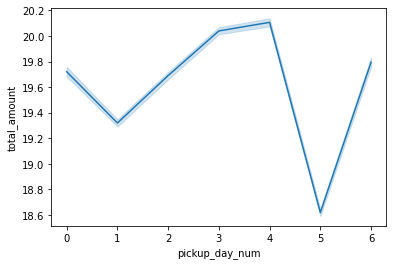

In [46]:
sns.lineplot(x='pickup_day_num',y='total_amount',data=df_train_val)

### Display most pickup & dropoff passengers zones


In [47]:
top_5_zone=df_train_val.PULocationID.value_counts(ascending=False).head()
top_5_zone1=df_train_val.DOLocationID.value_counts(ascending=False).head()
top_5_zone

237    300939
161    272809
236    268429
162    235475
186    230807
Name: PULocationID, dtype: int64

In [48]:
top_5_zone1

236    280673
237    269534
161    256394
230    198621
162    198268
Name: DOLocationID, dtype: int64

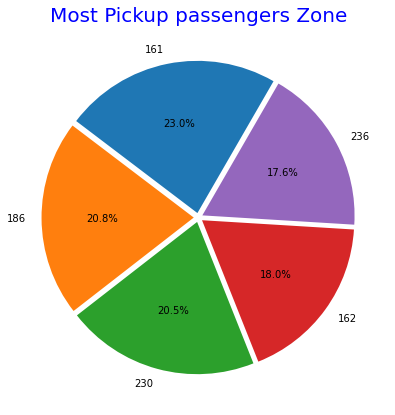

In [49]:
plt.figure(figsize = [9,7])
plt.title('Most Pickup passengers Zone',fontsize=20,color = 'b')

explode = (0.03, 0.03, 0.03, 0.03, 0.03)
labels = ['161','186','230','162','236']


plt.pie(x=top_5_zone, explode=explode,startangle=60, labels=labels,autopct='%0.01f%%')

plt.show()


### Display most drop off zone


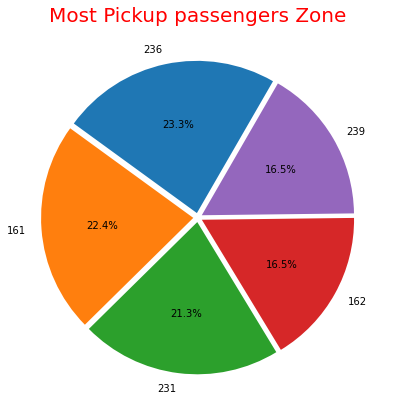

In [50]:
plt.figure(figsize = [9,7])
plt.title('Most Pickup passengers Zone',fontsize=20,color = 'r')

explode = (0.03, 0.03, 0.03, 0.03, 0.03)
labels = ['236','161','231','162','239']


plt.pie(x=top_5_zone1, explode=explode,startangle=60, labels=labels,autopct='%0.01f%%')

plt.show()

### Display most pickup & dropoff hours

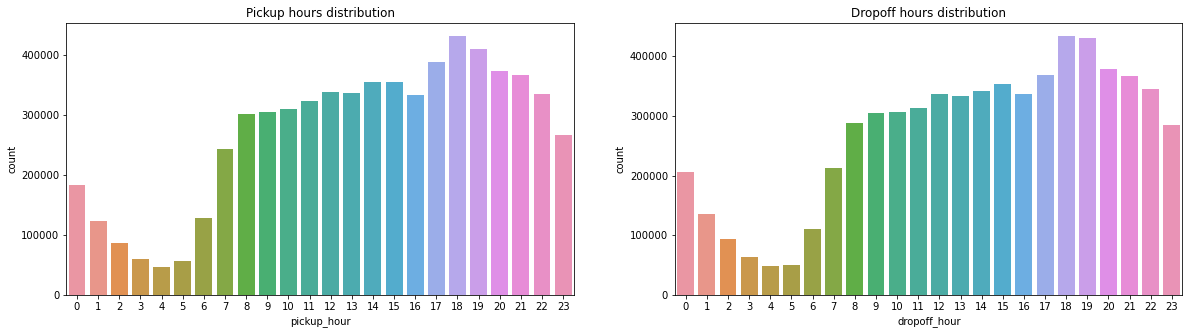

In [51]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup hours distribution')
ax=sns.countplot(x="pickup_hour",data=df_train_val,ax=ax1)
ax2.set_title('Dropoff hours distribution')
ax=sns.countplot(x="dropoff_hour",data=df_train_val,ax=ax2)

### Display most pickup & dropoff days

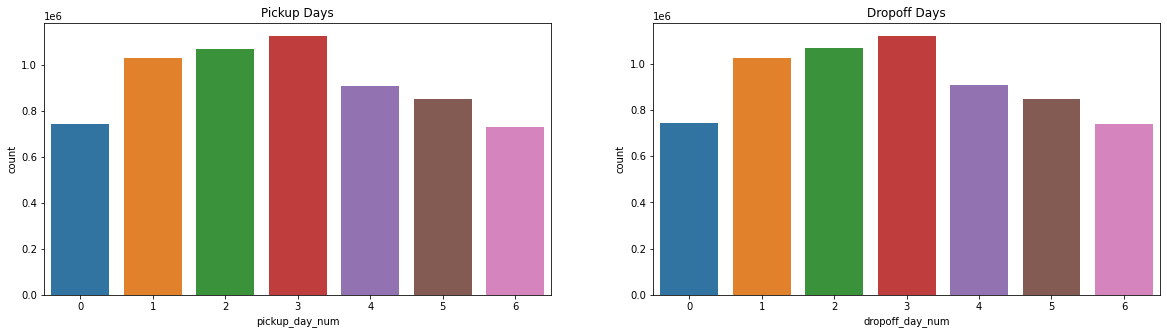

In [52]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day_num",data=df_train_val,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day_num",data=df_train_val,ax=ax2)


In [53]:
df_train_val['pickup_day_30'].value_counts().sort_values(ascending=False)

18    232809
3     230009
17    229642
24    227284
4     226448
25    225630
11    222848
10    221970
26    218787
23    217824
2     217806
31    215542
30    215451
19    215182
16    214312
22    213380
29    212543
15    211730
5     210688
12    204564
9     203592
8     201379
7     197489
28    192600
20    191498
21    189185
1     188310
27    186023
13    176835
6     175153
14    163866
Name: pickup_day_30, dtype: int64

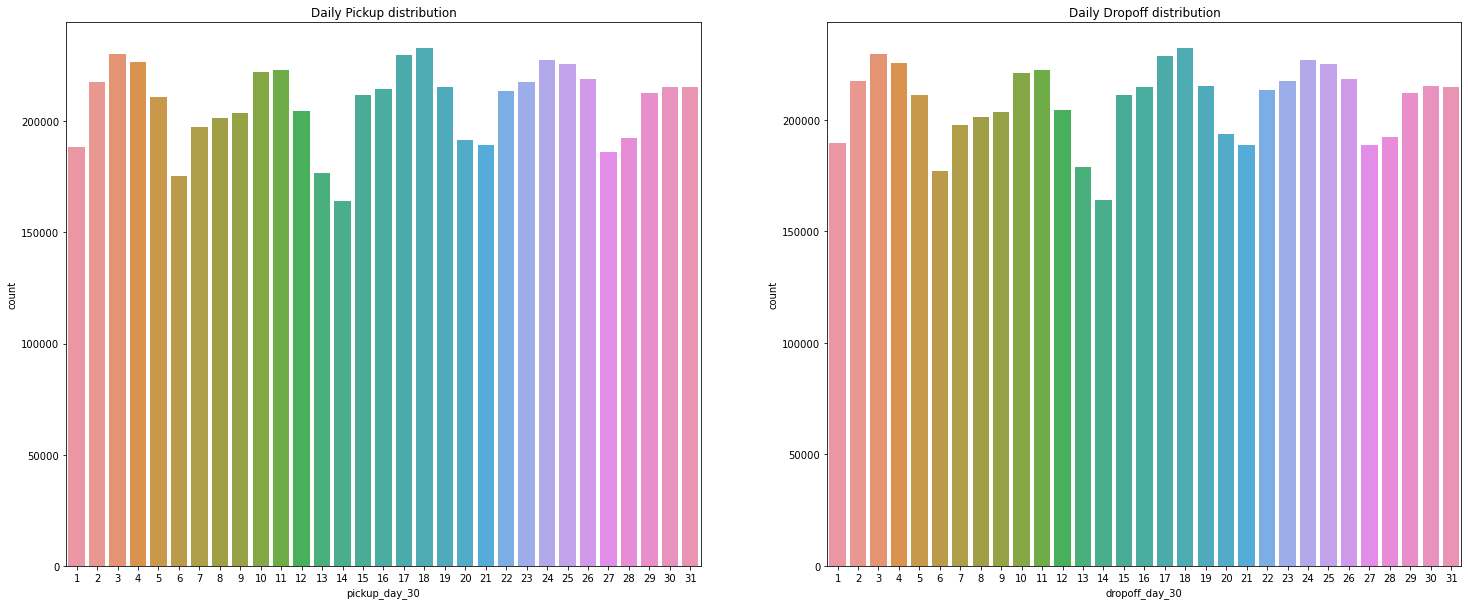

In [54]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(25,10))
ax1.set_title('Daily Pickup distribution')
ax=sns.countplot(x="pickup_day_30",data=df_train_val,ax=ax1)
ax2.set_title('Daily Dropoff distribution')
ax=sns.countplot(x="dropoff_day_30",data=df_train_val,ax=ax2)

### Display the number of pickup Passengers per hour 


<Figure size 1368x1080 with 0 Axes>

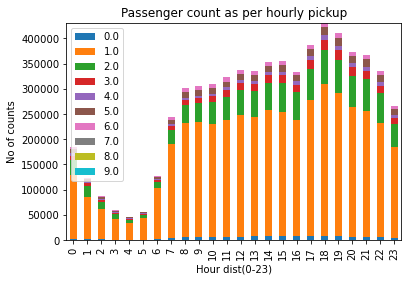

In [55]:
#Passenger count as per hourly pickup
plt.figure(figsize=(19,15))
passenger_per_hour=df_train_val.groupby(['pickup_hour','passenger_count']).size().unstack()
passenger_per_hour.plot(kind='bar',stacked=True,legend=False)
plt.xlabel('Hour dist(0-23)')
plt.ylabel('No of counts')
plt.title('Passenger count as per hourly pickup')
plt.legend(loc="upper left")

In [56]:
df_train_val.passenger_count.value_counts()

1.0    4557252
2.0     986644
3.0     267097
5.0     244973
6.0     143291
4.0     127194
0.0     123858
7.0         33
8.0         23
9.0         14
Name: passenger_count, dtype: int64

We can see about (34643) of trips have 0 passengers that maybe cancelled for some circumestances
as we should drop the outlier

In [57]:
df_train_val=df_train_val[df_train_val['passenger_count']!=0]
df_test=df_test[df_test['passenger_count']!=0]

In [58]:
df_train_val.passenger_count.value_counts()

1.0    4557252
2.0     986644
3.0     267097
5.0     244973
6.0     143291
4.0     127194
7.0         33
8.0         23
9.0         14
Name: passenger_count, dtype: int64

In [59]:
df_train_val.RatecodeID.value_counts()

1.0     6094921
2.0      178024
5.0       32277
3.0       15947
4.0        5048
99.0        269
6.0          35
Name: RatecodeID, dtype: int64

Notice there are 62 rows with rate code = 99 and most of trips have 0 passengers and 0 trip_distance ,which mean will drop it of traning set.

In [60]:
#drop the outlier from Ratecode
df_train_val=df_train_val[df_train_val['RatecodeID']!=0]
df_train_val=df_train_val[df_train_val['RatecodeID']<7]
#For test-set
df_test=df_test[df_test['RatecodeID']!=0]
df_test=df_test[df_test['RatecodeID']<7]

In [61]:
df_train_val.RatecodeID.value_counts()

1.0    6094921
2.0     178024
5.0      32277
3.0      15947
4.0       5048
6.0         35
Name: RatecodeID, dtype: int64

Now no outlier,we can draw it to see data

### Display the hieghest vendors beside on the number of passengers

<AxesSubplot:xlabel='VendorID', ylabel='passenger_count'>

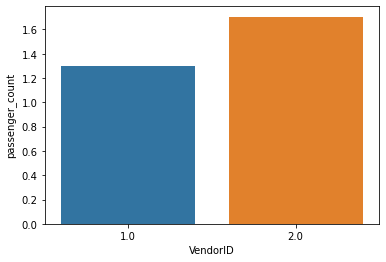

In [62]:
sns.barplot(y='passenger_count',x='VendorID',data=df_train_val)


## Visualizing "univarite feature" to show the distribution and delete the outlier or scalling the feature whenever we need it

## Fare Amount

In [63]:
df_train_val['fare_amount'].value_counts().sort_values(ascending=False)

6.50      294258
6.00      293373
7.00      290954
7.50      281925
5.50      280310
           ...  
64.08          1
22.48          1
111.10         1
42.11          1
30.45          1
Name: fare_amount, Length: 2305, dtype: int64

Text(0.5, 1.0, 'Fare amount trips using drop the outlier')

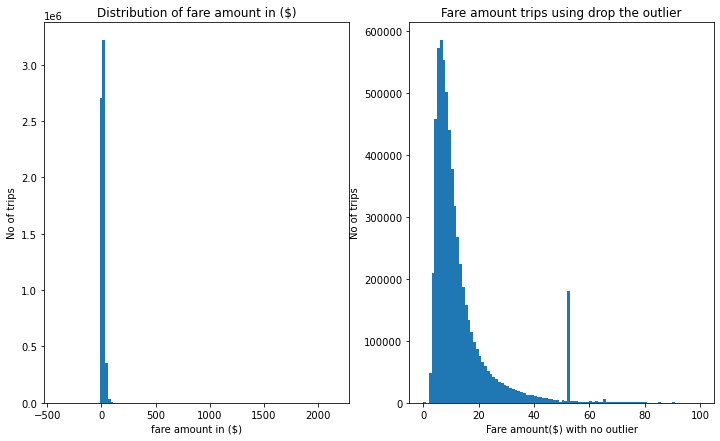

In [64]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12, 7))
#Plotting histogram
plt.subplot(121)
plt.hist(df_train_val['fare_amount'],bins=100)
plt.xlabel('fare amount in ($)')
plt.ylabel('No of trips')
plt.title('Distribution of fare amount in ($)')


#Plotting histogram with a log transformation
plt.subplot(122)
#drop the outliers
df_train_val=df_train_val[df_train_val.fare_amount>0]
df_train_val=df_train_val[df_train_val.fare_amount<100]

plt.hist(df_train_val['fare_amount'],bins=100)
plt.xlabel('Fare amount($) with no outlier')
plt.ylabel('No of trips')
plt.title('Fare amount trips using drop the outlier')

#Max trips lasted for shorter distances

We see from the histogram above the fare amount between (-50) and ($-60) have a fixed price and there are approximatlly 200000 trips in these prices, let me check in the next step

In [65]:
#for test-set
df_test=df_test[df_test.fare_amount>0]
df_test=df_test[df_test.fare_amount<100]

## Trip Distance

In [66]:
df_train_val['trip_distance'].value_counts()  

0.90     113797
0.80     113188
1.00     112912
1.10     107927
0.70     107419
          ...  
30.43         1
33.34         1
30.62         1
31.58         1
37.14         1
Name: trip_distance, Length: 3447, dtype: int64

In [67]:
df_train_val=df_train_val[df_train_val.trip_distance>0]
df_train_val=df_train_val[df_train_val.trip_distance<50]

In [68]:
#For test-set
df_test=df_test[df_test.trip_distance>0]
df_test=df_test[df_test.trip_distance<50]

Text(0.5, 1.0, 'Trips distance after dropping the outlier')

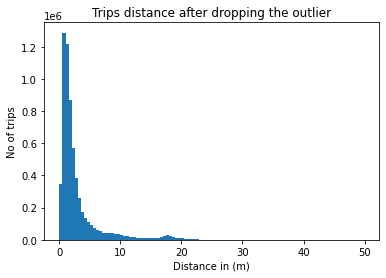

In [69]:
#Display the trip distance
#drop the outliers

plt.hist(df_train_val['trip_distance'].values,bins=100)
plt.xlabel('Distance in (m)')
plt.ylabel('No of trips')
plt.title('Trips distance after dropping the outlier')

#Max trips lasted for shorter distances

In [70]:
#yellow_trip_df['avg_speed_kph']=yellow_trip_df['trip_distance']/yellow_trip_df['trip_duration']
#yellow_trip_df
#df_train['trip_duration'].value_counts()

In [71]:
df_train_val['tolls_amount'].value_counts()

0.00      5886597
6.12       330782
10.50        4964
12.50        3884
2.80         3072
           ...   
25.30           1
102.24          1
27.42           1
9.92            1
12.96           1
Name: tolls_amount, Length: 790, dtype: int64

In [72]:
df_train_val.VendorID.value_counts()

2.0    4168344
1.0    2077674
Name: VendorID, dtype: int64

In [73]:
#Far_dictance = df_train_val.groupby('RatecodeID').count()['fare_amount'].sort_values(ascending=False).to_frame().reset_index()
#Far_dictance

In [74]:
#sns.histplot(df_train['trip_duration'],kde=False,bins=20);
#df_train.trip_duration.value_counts()
#Plotting Histogram 
#plt.figure(figsize=(10,7))
#plt.hist(df_train_val.log_duration,bins=100,color='darkred')
#plt.title('Trip duration(in min) distribution')



### Setting up for modeling and building a baseline:

### Clarify the correlations between whole features

In [75]:
df_train_val.corr()

VendorID  passenger_count  trip_distance  RatecodeID  \
VendorID               1.000000         0.162939       0.024295    0.010005   
passenger_count        0.162939         1.000000       0.012623    0.007651   
trip_distance          0.024295         0.012623       1.000000    0.493005   
RatecodeID             0.010005         0.007651       0.493005    1.000000   
PULocationID          -0.011409        -0.005806      -0.100802   -0.039114   
DOLocationID          -0.004916        -0.004367      -0.110543   -0.028839   
payment_type          -0.018260         0.018953      -0.010272   -0.005496   
fare_amount            0.019799         0.012265       0.934920    0.582858   
extra                 -0.876104        -0.139160      -0.008840   -0.005700   
mta_tax                0.005965        -0.001646      -0.158391   -0.568362   
tip_amount             0.019699        -0.003956       0.544368    0.354468   
tolls_amount           0.010208         0.007699       0.575232    0.443203   
improvement_surcharge -0.008919         0.005191      -0.001261   -0.035823   
total_amount           0.020768         0.010640       0.918412    0.585111   
congestion_surcharge  -0.012669         0.007160      -0.235907   -0.164034   
pickup_day_num         0.010570         0.030544       0.010714    0.006316   
dropoff_day_num        0.010826         0.030684       0.011366    0.005966   
pickup_day_30          0.001587        -0.000051       0.001763    0.002193   
dropoff_day_30         0.001612        -0.000091       0.001862    0.002297   
pickup_hour            0.000492         0.014540      -0.007219   -0.006496   
dropoff_hour          -0.001505         0.013209      -0.006965   -0.000845   
trip_duration          0.034011         0.014603       0.140419    0.058397   

                       PULocationID  DOLocationID  payment_type  fare_amount  \
VendorID                  -0.011409     -0.004916     -0.018260     0.019799   
passenger_count           -0.005806     -0.004367      0.018953     0.012265   
trip_distance             -0.100802     -0.110543     -0.010272     0.934920   
RatecodeID                -0.039114     -0.028839     -0.005496     0.582858   
PULocationID               1.000000      0.091189     -0.027391    -0.095056   
DOLocationID               0.091189      1.000000     -0.028843    -0.110228   
payment_type              -0.027391     -0.028843      1.000000    -0.013959   
fare_amount               -0.095056     -0.110228     -0.013959     1.000000   
extra                      0.022113      0.020845     -0.010746    -0.010659   
mta_tax                    0.004615      0.067287      0.003739    -0.261639   
tip_amount                -0.037362     -0.045676     -0.498517     0.577422   
tolls_amount              -0.046769     -0.059746     -0.023041     0.576740   
improvement_surcharge      0.000990     -0.000474     -0.012357    -0.012547   
total_amount              -0.083849     -0.098593     -0.117715     0.976383   
congestion_surcharge       0.131130      0.135305     -0.114673    -0.228394   
pickup_day_num            -0.034640     -0.030426      0.024736     0.007120   
dropoff_day_num           -0.034899     -0.030812      0.024296     0.008057   
pickup_day_30              0.001781      0.002589     -0.002018     0.003518   
dropoff_day_30             0.001948      0.002638     -0.001979     0.003512   
pickup_hour                0.020024      0.018224     -0.018105     0.005944   
dropoff_hour               0.023487      0.021911     -0.016248     0.010836   
trip_duration             -0.015539     -0.018126      0.001051     0.154922   

                          extra   mta_tax  tip_amount  tolls_amount  \
VendorID              -0.876104  0.005965    0.019699      0.010208   
passenger_count       -0.139160 -0.001646   -0.003956      0.007699   
trip_distance         -0.008840 -0.158391    0.544368      0.575232   
RatecodeID            -0.005700 -0.568362    0.354468      0.443203   
PULocatio

In [76]:
df_train_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6246018 entries, 4105733 to 4500015
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  pickup_day_num  

In [77]:
df_train_val.describe()

VendorID  passenger_count  trip_distance    RatecodeID  \
count  6.246018e+06     6.246018e+06   6.246018e+06  6.246018e+06   
mean   1.667360e+00     1.571509e+00   2.990714e+00  1.041745e+00   
std    4.711588e-01     1.172594e+00   3.812846e+00  2.684860e-01   
min    1.000000e+00     1.000000e+00   1.000000e-02  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.000000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.660000e+00  1.000000e+00   
75%    2.000000e+00     2.000000e+00   3.040000e+00  1.000000e+00   
max    2.000000e+00     9.000000e+00   4.987000e+01  6.000000e+00   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  6.246018e+06  6.246018e+06  6.246018e+06  6.246018e+06  6.246018e+06   
mean   1.641136e+02  1.619721e+02  1.274607e+00  1.334028e+01  1.122597e+00   
std    6.559064e+01  6.977756e+01  4.621057e-01  1.108675e+01  1.255534e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e-02 -1.662000e+01   
25%    1.320000e+02  1.130000e+02  1.000000e+00  6.500000e+00  0.000000e+00   
50%    1.620000e+02  1.620000e+02  1.000000e+00  9.500000e+00  5.000000e-01   
75%    2.330000e+02  2.340000e+02  2.000000e+00  1.500000e+01  2.500000e+00   
max    2.650000e+02  2.650000e+02  4.000000e+00  9.999000e+01  6.250000e+01   

            mta_tax    tip_amount  tolls_amount  improvement_surcharge  \
count  6.246018e+06  6.246018e+06  6.246018e+06           6.246018e+06   
mean   4.982118e-01  2.286053e+00  3.786598e-01           2.999479e-01   
std    3.089076e-02  2.724511e+00  1.811102e+00           3.953637e-03   
min    0.000000e+00  0.000000e+00  0.000000e+00           0.000000e+00   
25%    5.000000e-01  0.000000e+00  0.000000e+00           3.000000e-01   
50%    5.000000e-01  1.960000e+00  0.000000e+00           3.000000e-01   
75%    5.000000e-01  3.000000e+00  0.000000e+00           3.000000e-01   
max    1.942000e+01  3.535000e+02  9.125000e+02           3.000000e-01   

       total_amount  congestion_surcharge  pickup_day_num  dropoff_day_num  \
count  6.246018e+06          6.246018e+06    6.246018e+06     6.246018e+06   
mean   1.948034e+01          2.328631e+00    2.913970e+00     2.919095e+00   
std    1.393370e+01          6.317013e-01    1.875510e+00     1.878245e+00   
min    3.100000e-01          0.000000e+00    0.000000e+00     0.000000e+00   
25%    1.175000e+01          2.500000e+00    1.000000e+00     1.000000e+00   
50%    1.530000e+01          2.500000e+00    3.000000e+00     3.000000e+00   
75%    2.130000e+01          2.500000e+00    4.000000e+00     4.000000e+00   
max    9.608000e+02          2.750000e+00    6.000000e+00     6.000000e+00   

       pickup_day_30  dropoff_day_30   pickup_hour  dropoff_hour  \
count   6.246018e+06    6.246018e+06  6.246018e+06  6.246018e+06   
mean    1.607578e+01    1.607250e+01  1.396076e+01  1.400354e+01   
std     8.965987e+00    8.966107e+00  5.980850e+00  6.078097e+00   
min     1.000000e+00    1.000000e+00  0.000000e+00  0.000000e+00   
25%     8.000000e+00    8.000000e+00  1.000000e+01  1.000000e+01   
50%     1.600000e+01    1.600000e+01  1.500000e+01  1.500000e+01   
75%     2.400000e+01    2.400000e+01  1.900000e+01  1.900000e+01   
max     3.100000e+01    3.100000e+01  2.300000e+01  2.300000e+01   

       trip_duration  
count   6.246018e+06  
mean    1.850324e+01  
std     7.178461e+01  
min    -5.179367e+04  
25%     7.216667e+00  
50%     1.200000e+01  
75%     1.951667e+01  
max     4.212083e+03

There are alot of variables, Let's pick out just a few columns and start building models using that.

##  Visualizing "Multivarite features" to understand the relationship between independent (features_X) and dependent (Y_feature= Fare amount).

### the distibution between fare amount and trip distance

In [78]:
#sns.catplot(x='passenger_count',y='fare_amount',data=df_train_val)

In [79]:
#sns.lineplot(x='tripp_distance',y='fare_amount',data=df_train_val)


In [80]:
df_train_val.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'pickup_day_num',
       'dropoff_day_num', 'pickup_day_30', 'dropoff_day_30', 'pickup_hour',
       'dropoff_hour', 'trip_duration'],
      dtype='object')

In [82]:
""""
plt.figure(figsize=(12,12))
sns.scatterplot(x='pickup_day_num',y='fare_amount',data=df_train_val,edgecolor='None',alpha=0.5,color='darkblue')
plt.xlabel('peakhour')
plt.ylabel('congestion_surcharge amount')
plt.title('the distribution between fare amount and peakup_day_30')"""

'"\nplt.figure(figsize=(12,12))\nsns.scatterplot(x=\'pickup_day_num\',y=\'fare_amount\',data=df_train_val,edgecolor=\'None\',alpha=0.5,color=\'darkblue\')\nplt.xlabel(\'peakhour\')\nplt.ylabel(\'congestion_surcharge amount\')\nplt.title(\'the distribution between fare amount and peakup_day_30\')'

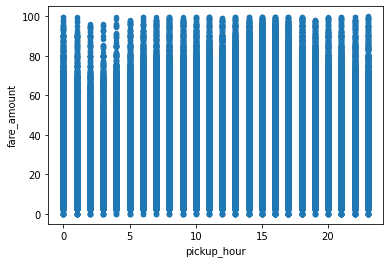

In [83]:
df_train_val.plot(kind="scatter", x="pickup_hour", y="fare_amount");


In [84]:
#df_train_val.plot(kind="scatter", x="trip_duration", y="fare_amount", alpha=0.1);


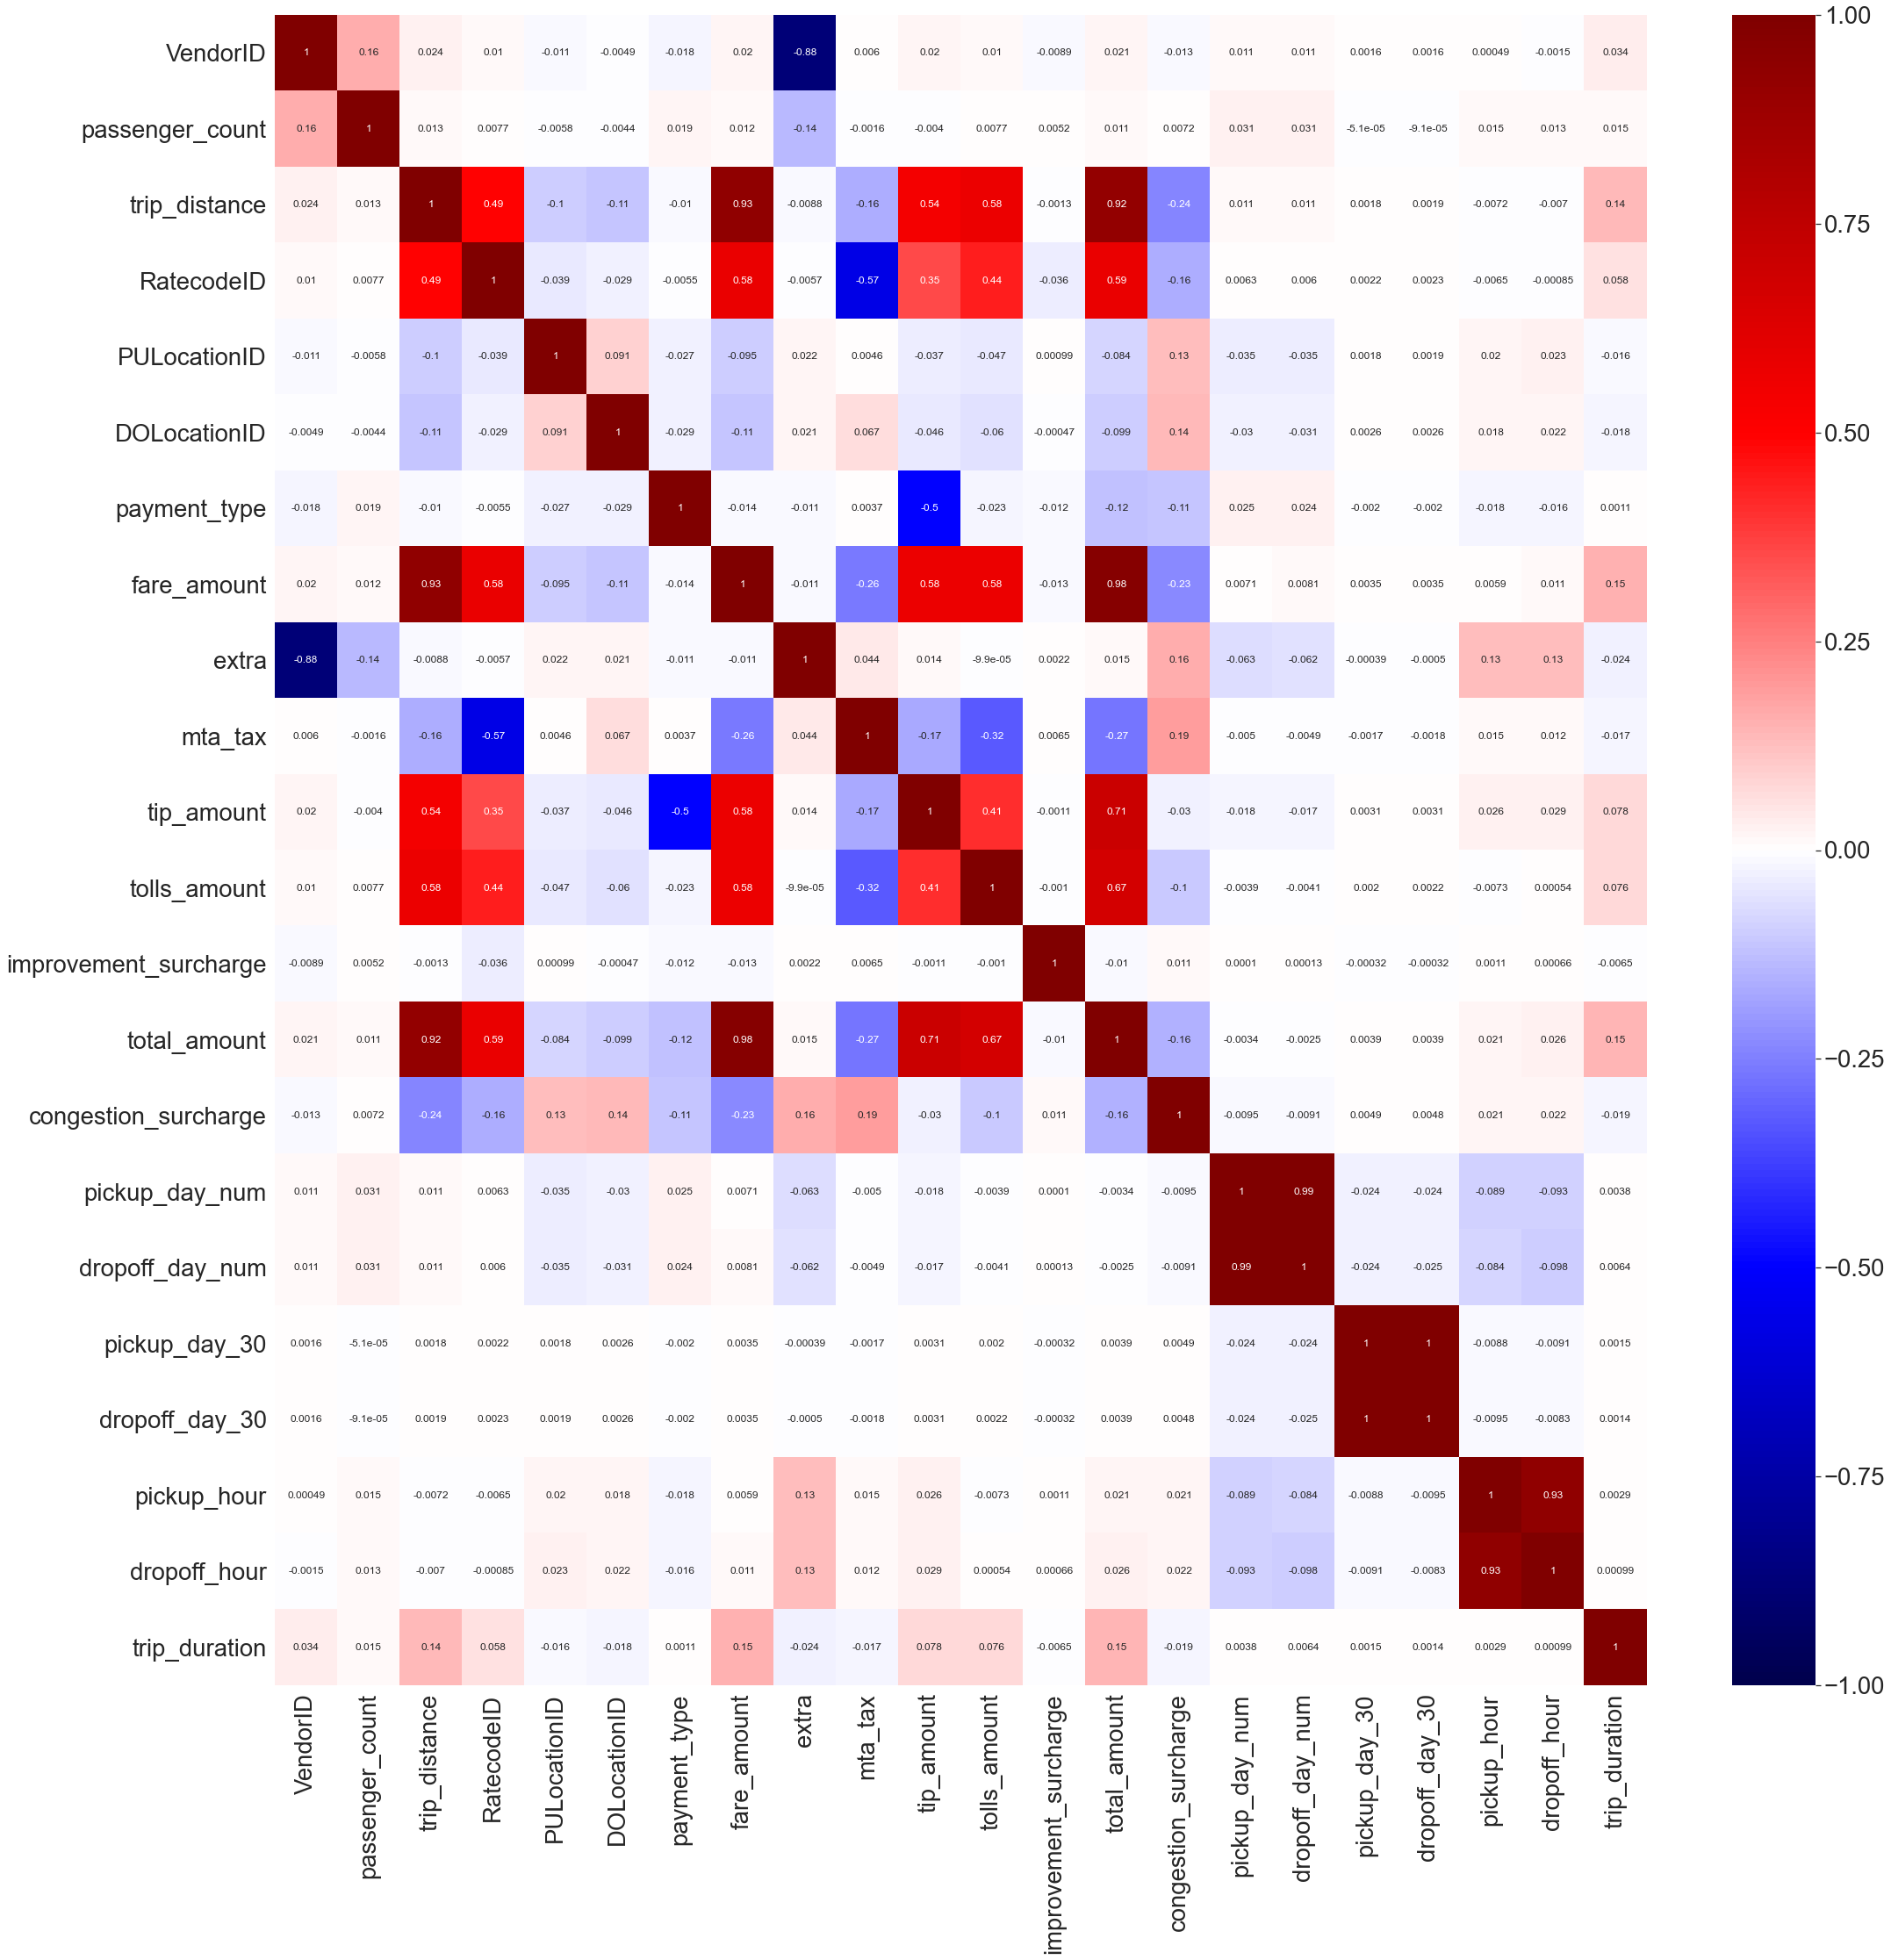

In [85]:
#To see a better corr matrix
sns.set(font_scale=2.5)
fig, ax = plt.subplots(figsize=(35,35)) 
sns.heatmap(df_train_val.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, annot_kws={"size":12});

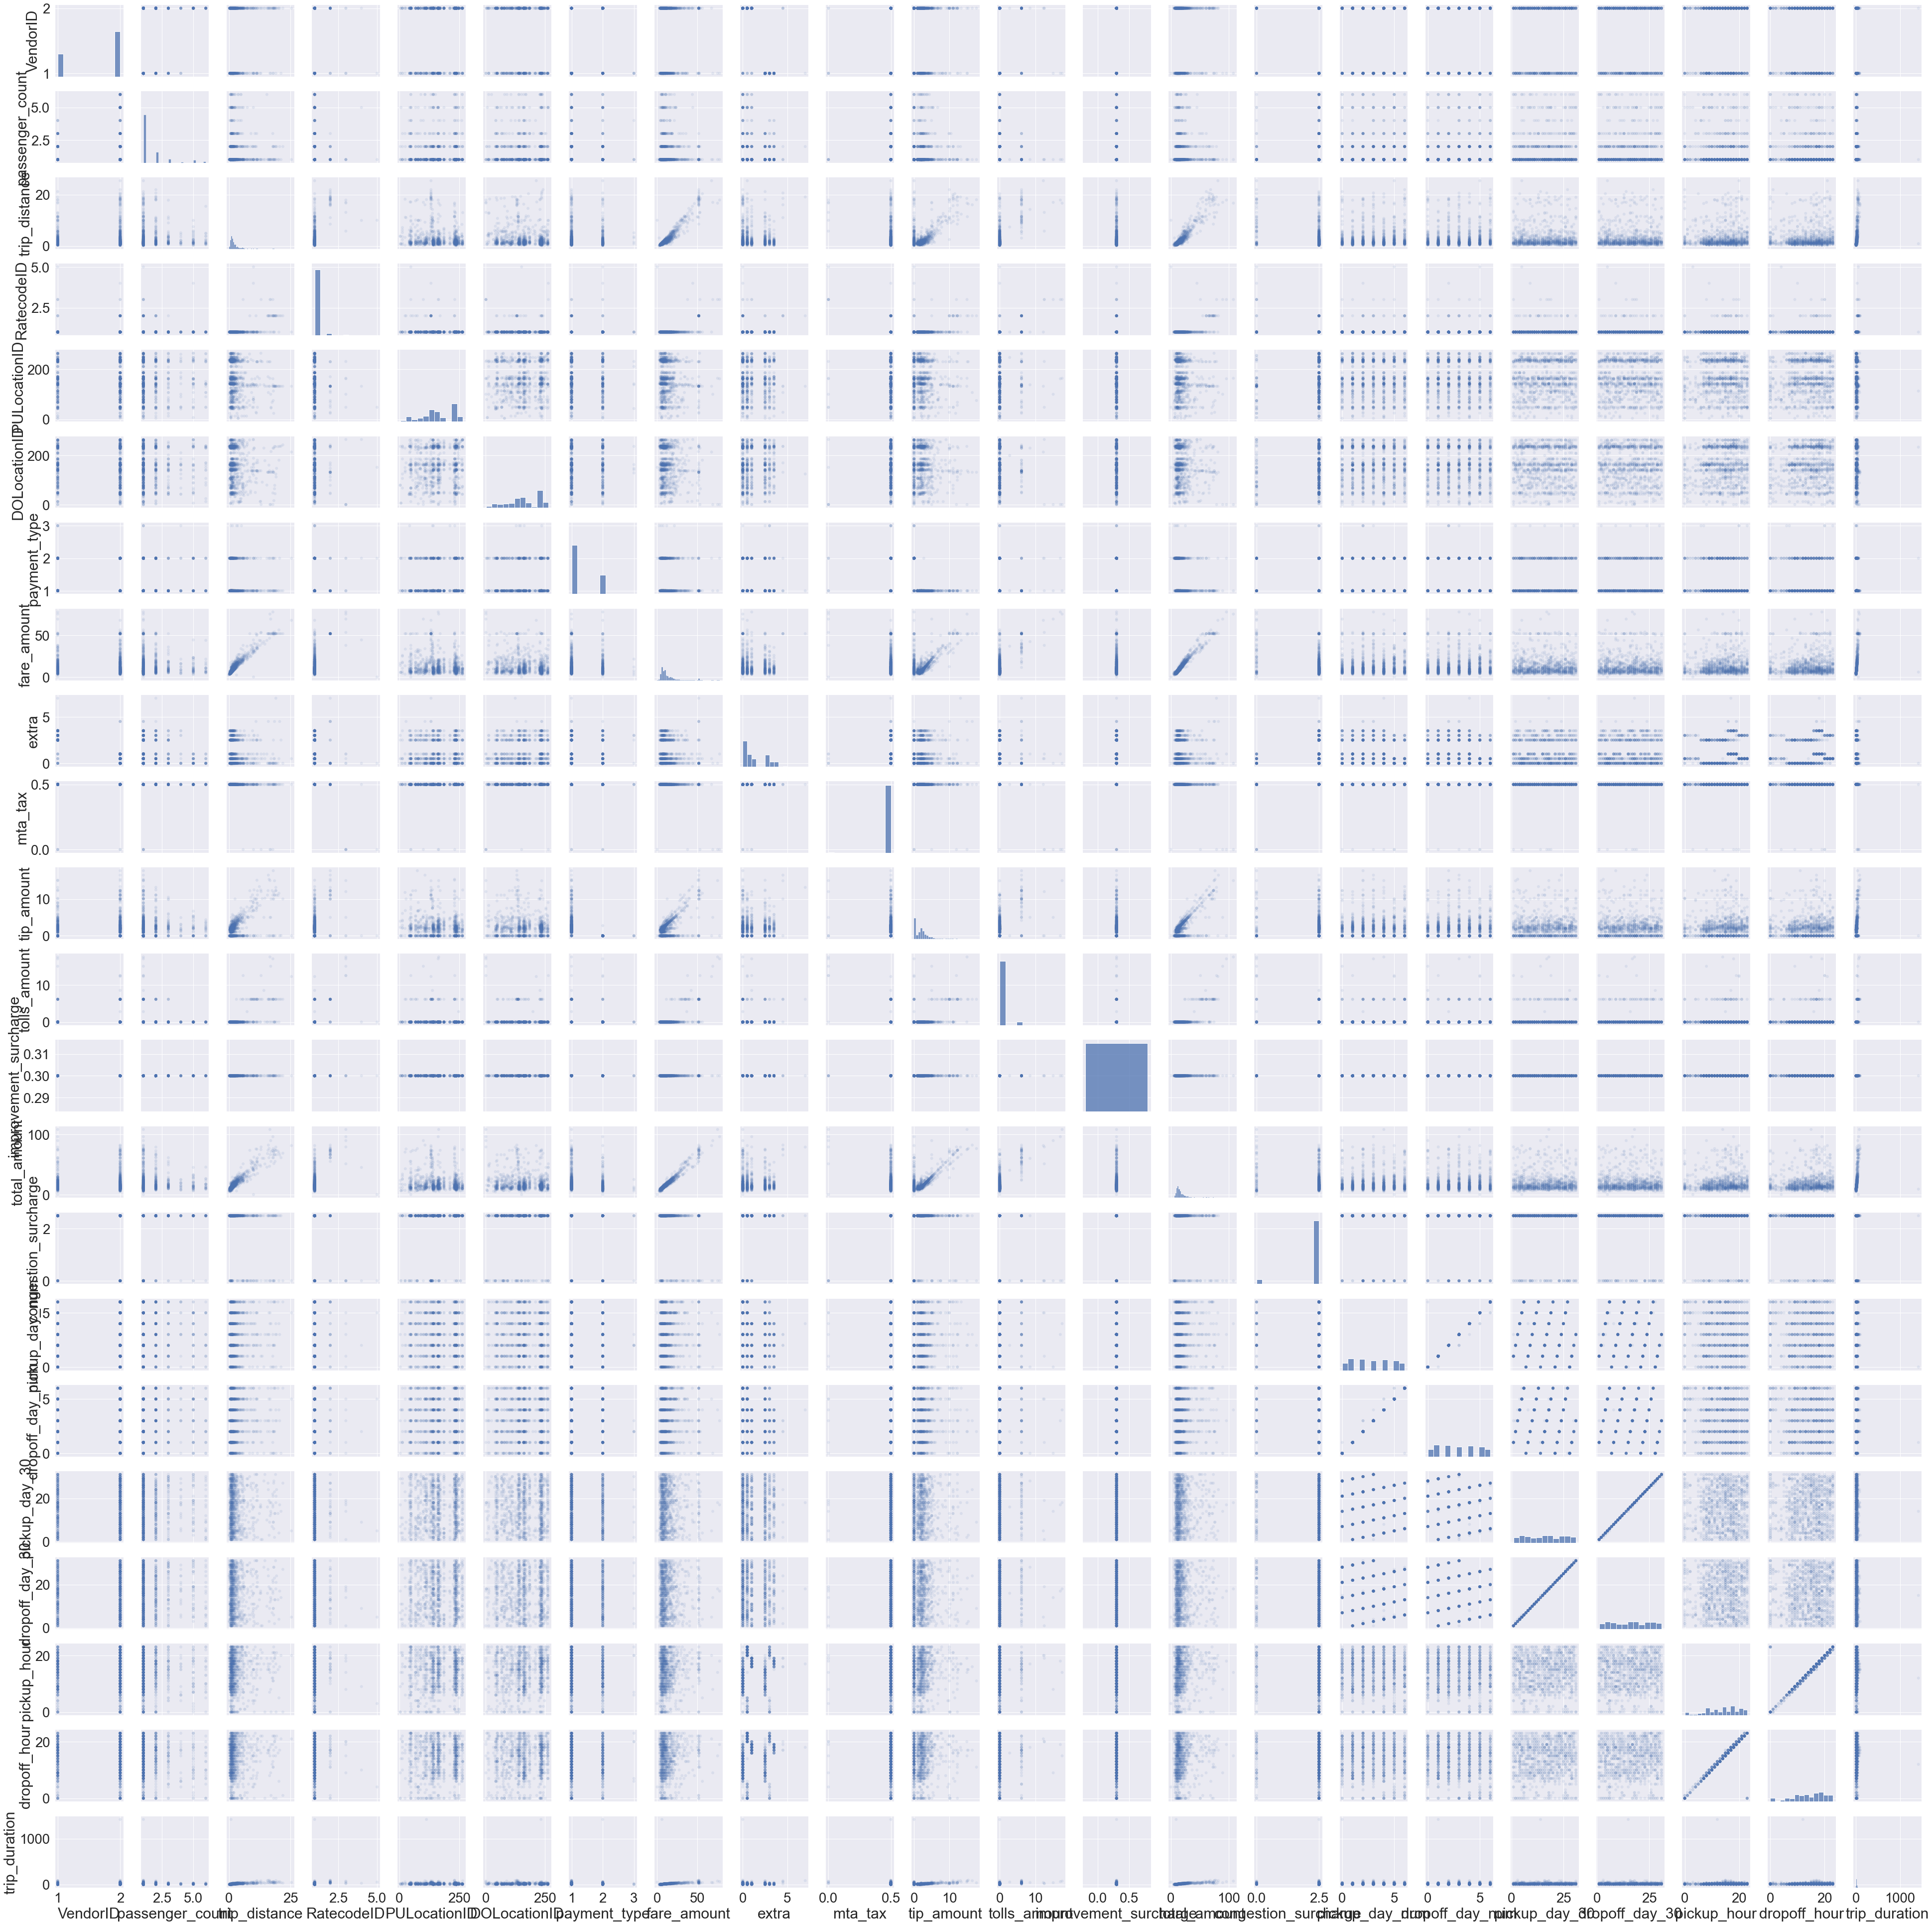

In [86]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df_train_val[:1000], plot_kws=dict(alpha=.1, edgecolor='none'))

In [87]:
#accordint to the correlation figure above i choose these features
x,y = df_train_val.loc[:,['trip_distance','trip_duration']], df_train_val['fare_amount']
x_test,y_test = df_test.loc[:,['trip_distance','trip_duration']], df_test['fare_amount']

In [88]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    tra_score = lr_model.score(X_train, y_train)

    # report results
    print('\nTraining R^2 score was:', tra_score)
    print('\nValidation R^2 score was:', val_score)
    print('\nFeature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

### Ordinary Least Squares Regression with Statsmodels

In [89]:
# Create your model
model = sm.OLS(y, x)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                          2.649e+07
Date:                Sat, 04 Dec 2021   Prob (F-statistic):                        0.00
Time:                        17:25:08   Log-Likelihood:                     -1.9660e+07
No. Observations:             6246018   AIC:                                  3.932e+07
Df Residuals:                 6246016   BIC:                                  3.932e+07
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
trip_distance     3.3407      0.000   6932.988      0.000       3.340       3.342
trip_duration     0.0103   3.15e-05    328.543      0.000       0.010       0.010
==============================================================================
Omnibus:                  3909424.225   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1442863660.740
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                      77.372   Cond. No.                         15.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above figure we see the scores suggest that the model found some important features and marked all other features with a zero coefficient, as we will drop it from the model

In [90]:
split_and_validate(x, y)


Training R^2 score was: 0.8744682067178815

Validation R^2 score was: 0.8753588513700749

Feature coefficient results: 

trip_distance : 2.71
trip_duration : 0.00


## Features Engineering - Polynomial Regression

## Adding categrical feature after transfer it to dummy variables

In [91]:
pd.get_dummies(df_train_val['RatecodeID'],drop_first=True)
#For test-set
pd.get_dummies(df_test['RatecodeID'],drop_first=True)


2.0  3.0  4.0  5.0  6.0
5964823    0    0    0    0    0
678197     0    0    0    0    0
1474982    0    0    0    0    0
3853979    0    0    0    0    0
3327421    0    0    0    0    0
...      ...  ...  ...  ...  ...
7161019    0    0    0    0    0
286452     0    0    0    0    0
5457604    0    0    0    0    0
2611642    0    0    0    0    0
4983310    0    0    0    0    0

[693929 rows x 5 columns]

In [92]:
pd.get_dummies(df_train_val['VendorID'],drop_first=True)
#Test-set
pd.get_dummies(df_test['VendorID'],drop_first=True)

2.0
5964823    0
678197     1
1474982    1
3853979    0
3327421    0
...      ...
7161019    1
286452     0
5457604    1
2611642    0
4983310    1

[693929 rows x 1 columns]

In [93]:
#pd.get_dummies(df_train_val['store_and_fwd_flag'],drop_first=True)

In [94]:
df_train_val

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4105733       1.0  2019-10-18 21:29:40   2019-10-18 21:35:48              1.0   
1489464       1.0  2019-10-07 14:11:02   2019-10-07 14:22:17              1.0   
2523390       2.0  2019-10-11 21:06:52   2019-10-11 21:12:58              5.0   
3723990       2.0  2019-10-17 11:58:59   2019-10-17 12:14:18              2.0   
1316130       2.0  2019-10-06 16:25:39   2019-10-06 16:35:14              1.0   
...           ...                  ...                   ...              ...   
2249467       2.0  2019-10-10 20:42:23   2019-10-10 20:50:20              1.0   
5157699       2.0  2019-10-23 15:12:14   2019-10-23 16:06:52              1.0   
2215104       2.0  2019-10-10 18:21:06   2019-10-10 18:43:37              1.0   
1484405       2.0  2019-10-07 14:55:43   2019-10-07 15:18:17              1.0   
4500015       2.0  2019-10-20 14:19:35   2019-10-20 14:21:33              5.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
4105733           0.50         1.0                  N            48   
1489464           1.00         1.0                  N           237   
2523390           0.66         1.0                  N             7   
3723990           3.10         1.0                  N           211   
1316130           0.70         1.0                  N           233   
...                ...         ...                ...           ...   
2249467           1.08         1.0                  N           186   
5157699          16.90         2.0                  N           132   
2215104           1.94         1.0                  N           161   
1484405           7.23         1.0                  N           239   
4500015           0.33         1.0                  N           107   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
4105733           230           1.0          5.5    3.0      0.5        1.86   
1489464           236           1.0          8.5    2.5      0.5        2.35   
2523390             7           2.0          5.5    0.5      0.5        0.00   
3723990           246           2.0         13.5    0.0      0.5        0.00   
1316130           229           1.0          7.5    0.0      0.5        2.05   
...               ...           ...          ...    ...      ...         ...   
2249467           234           1.0          7.0    0.5      0.5        2.16   
5157699           170           2.0         52.0    0.0      0.5        0.00   
2215104           141           1.0         14.5    1.0      0.5        1.00   
1484405            87           1.0         23.5    0.0      0.5        5.36   
4500015           107           1.0          3.5    0.0      0.5        1.70   

         tolls_amount  improvement_surcharge  total_amount  \
4105733          0.00                    0.3         11.16   
1489464          0.00                    0.3         14.15   
2523390          0.00                    0.3          6.80   
3723990          0.00                    0.3         16.80   
1316130          0.00                    0.3         12.85   
...               ...                    ...           ...   
2249467          0.00                    0.3         12.96   
5157699          6.12                    0.3         61.42   
2215104          0.00                    0.3         19.80   
1484405          0.00                    0.3         32.16   
4500015          0.00                    0.3          8.50   

         congestion_surcharge  pickup_day_num  dropoff_day_num  pickup_day_30  \
4105733                   2.5               4                4             18   
1489464                   2.5               0                0              7   
2523390                   0.0               4                4             11   
3723990                   2.5               3                3             17   
1316130                   2.5               6                6          

In [95]:
#add a new features after transferd it to dummy variables and chech the score
x1 = x.copy()
x1['RatecodeID'] = df_train_val['RatecodeID']
x1['VendorID'] = df_train_val['VendorID']
#x1['store_and_fwd_flag'] = df_train_val['store_and_fwd_flag']

split_and_validate(pd.get_dummies(x1), y)


Training R^2 score was: 0.8942982757550721

Validation R^2 score was: 0.8947472455630794

Feature coefficient results: 

trip_distance : 2.48
trip_duration : 0.00
RatecodeID : 6.67
VendorID : -0.08


In [96]:
x1_test = x_test.copy()
x1_test['RatecodeID'] = df_test['RatecodeID']
x1_test['VendorID'] = df_test['VendorID']

## Adding polynomial Features

In [97]:
#add a new feature to see how the number of passengers will affect on the fare_amount 
x1['is_van'] = np.where(df_train_val['passenger_count'] >= 4, 1, 0)
#for test-set
x1_test['is_van'] = np.where(df_test['passenger_count'] >= 4, 1, 0)

print(df_train_val.passenger_count.mode())

0    1.0
dtype: float64


In [98]:
# Dafine a function to set is the trip in peak hour or not?
def peakHour(h): 
    if h >= 17 and h<=19:
        return 1
    #elif h >= 1 and h <= 4:
        #return 1
    else:
        return 0
# df_train['is_van'] = np.where(peakHour() , 1, 0)

In [99]:
#add anthor feature to see how Peak hours will effect on the fare_amount 
x1['peakHours'] = df_train_val.loc[:,'pickup_hour'].apply(peakHour)
#For test-set
x1_test['peakHours'] = df_test.loc[:,'pickup_hour'].apply(peakHour)

print(df_train_val.pickup_hour.mode())

0    18
dtype: int64


In [100]:
# add more featurs to see how the peak day will effect also on the fare amount 
def peakDays(d): 
    if d >= 1 and d < 4:
        return 1
    else:
        return 0

In [101]:
x1['peakDays'] = df_train_val.loc[:,'pickup_day_num'].apply(peakDays)
#For test-set
x1_test['peakDays'] = df_test.loc[:,'pickup_day_num'].apply(peakDays)

print(df_train_val.pickup_day_num.mode())


0    3
dtype: int64


In [102]:
x2 = x1.copy()

In [103]:
x2_test = x1_test.copy()

In [104]:
x2.columns

Index(['trip_distance', 'trip_duration', 'RatecodeID', 'VendorID', 'is_van',
       'peakHours', 'peakDays'],
      dtype='object')

In [105]:
split_and_validate(x2, y)


Training R^2 score was: 0.8947861251316085

Validation R^2 score was: 0.8952295282656157

Feature coefficient results: 

trip_distance : 2.48
trip_duration : 0.00
RatecodeID : 6.66
VendorID : -0.07
is_van : -0.03
peakHours : 0.32
peakDays : 0.42


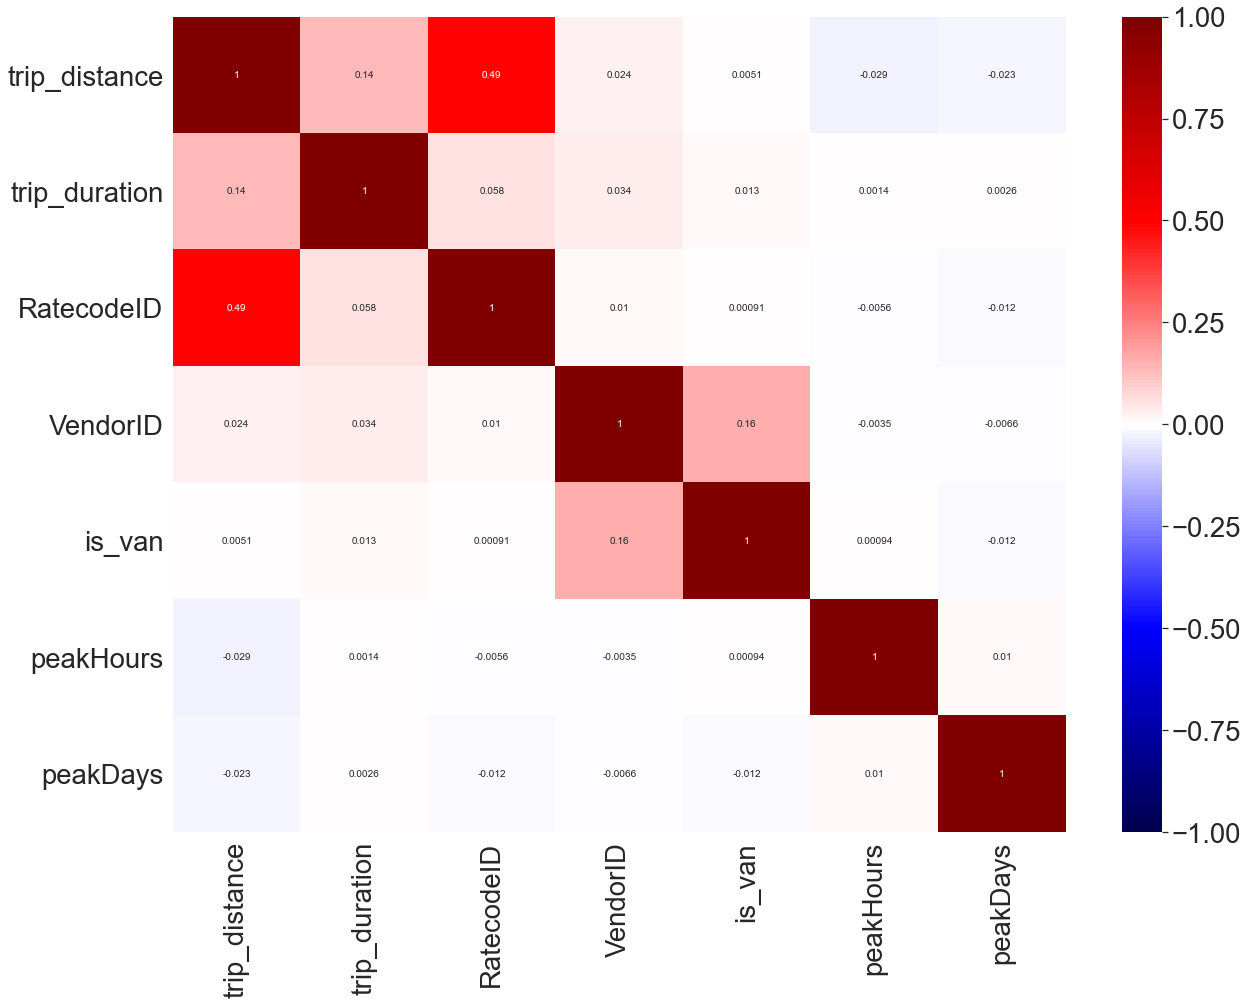

In [106]:
sns.set(font_scale=2.5)
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(x2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, annot_kws={"size":10});

## Adding polynomial terms or transformations

One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like 'congestion_surcharge' and 'extra', we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic polynomial terms or transformations for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

In [107]:
x3 = x2.copy()

x3['Rc'] = x3['RatecodeID'] ** 2
#x3['VI'] = x3['VendorID'] ** 2

#For tset-set
x3_test = x2_test.copy()

x3_test['Rc'] = x3_test['RatecodeID'] ** 2

split_and_validate(x3, y)


Training R^2 score was: 0.897505477524238

Validation R^2 score was: 0.8980155739506148

Feature coefficient results: 

trip_distance : 2.58
trip_duration : 0.00
RatecodeID : -2.27
VendorID : -0.08
is_van : -0.02
peakHours : 0.35
peakDays : 0.42
Rc : 1.80


## Adding interaction terms
With our current feature set, each feature value has no influence over how the model views other features' values. Each feature is treated as a completely independent quantity. However, there may easily be interaction effects present, in which the impact of one feature may dependent on the current value of a different feature.

In [108]:
x4 = x3.copy()

# multiplicative interaction
x4['Rc_dis'] = x4['RatecodeID'] * x4['trip_distance']
x4['D_h'] = x4['peakDays'] * x4['peakHours']

split_and_validate(x4, y)


Training R^2 score was: 0.9117863195564208

Validation R^2 score was: 0.9126082215347319

Feature coefficient results: 

trip_distance : 3.48
trip_duration : 0.00
RatecodeID : 17.35
VendorID : -0.12
is_van : 0.00
peakHours : 0.45
peakDays : 0.46
Rc : -0.46
Rc_dis : -0.80
D_h : -0.14


In [109]:
x4.shape

(6246018, 10)

In [110]:
y.shape

(6246018,)

In [111]:
#For test-set
x4_test = x3_test.copy()

# multiplicative interaction
x4_test['Rc_dis'] = x4_test['RatecodeID'] * x4_test['trip_distance']
x4_test['D_h'] = x4_test['peakDays'] * x4_test['peakHours']

## Standard-scaling Features 

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [113]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set
x5=x4.copy()
std = StandardScaler()
std.fit(x5.values)

StandardScaler()

In [114]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X_tr = std.transform(x5.values)

In [115]:
## Note that even though we put a Pandas Dataframe into the scalar, what comes out is a numpy array
## In general, sklearn works on numpy.  It will accept pandas objects by trying to coerce them to numpy arrays
## But it will not usually output pandas objects

type(x5), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [116]:
## Apply the scaler to the test set

X_te = std.transform(x4_test.values)

In [117]:
# import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [121]:
# #Set  up the plot
# fig,ax = plt.subplots(1,1)
# # Set the degree of our polynomial
# degree = 2

# # Generate the model type with make_pipeline
# # This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# # a linear regression on the resulting features
# est = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# # Fit our model to the training data
# est.fit(x4, y)
# # Plot the results
# plot_approximation(est, ax, label='degree=%d' % degree)


In [122]:
lm = LinearRegression() # construct LinearRegression model object
lm.fit(x5, y) #fit model to features X, target y

preds=lm.predict(x5) # generate predictions for X using fit model
lm.score(x5,y) 

0.9119508332140408

In [123]:
# extract feature coefficients and intercept from fit model
print(lm.intercept_)
print(lm.coef_)

-11.949115860002442
[ 3.48672218e+00  3.78563491e-03  1.74081507e+01 -1.20833174e-01
  4.09314533e-03  4.45385084e-01  4.59116489e-01 -4.67450657e-01
 -8.01713098e-01 -1.33166298e-01]


In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = mean_squared_error(y, preds, squared=False)
mae = mean_absolute_error(y, preds)

In [125]:
print(rmse)
print(mae)

3.2897792164254533
2.0587359566941585


In [142]:
x5= x5.transpose()

In [143]:
x4.shape

(6246018, 10)

In [128]:
y.shape

(6246018,)

In [133]:
lm.fit(x5,y)
#print(f'Linear Regression test R^2: {lm.score(x5_test, y_test):.3f}')

ValueError: Found input variables with inconsistent numbers of samples: [10, 6246018]

In [131]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred #eeror
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [136]:
# diagnostic_plot(x,y)

In [138]:
print(rmse)
print(mae)

3.2897792164254533
2.0587359566941585


**Benchmarks that i follow in choosing the best model**:

> 1. Baseline feature set: ~.874 R^2 
> 3. Add Category features (RatecodeID): ~.894 R^2
> 4. Add Category features (VendorID): ~.894 R^2
> 2. Add Several polynomial transforms: ~.897 R^2
> 5. Add Several interaction terms: ~.911 R^2
> 6. Add Standard-scaling Features terms: ~.911 R^2

 

## Test Set

In [139]:
df_test

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5964823       1.0  2019-10-26 19:02:39   2019-10-26 19:12:49              2.0   
678197        2.0  2019-10-03 21:25:24   2019-10-03 21:38:52              1.0   
1474982       2.0  2019-10-07 13:03:37   2019-10-07 13:41:27              6.0   
3853979       1.0  2019-10-17 21:21:52   2019-10-17 21:58:30              1.0   
3327421       1.0  2019-10-15 19:38:20   2019-10-15 19:54:20              1.0   
...           ...                  ...                   ...              ...   
7161019       2.0  2019-10-31 23:47:19   2019-10-31 23:54:12              1.0   
286452        1.0  2019-10-02 12:41:37   2019-10-02 12:49:49              1.0   
5457604       2.0  2019-10-24 18:26:11   2019-10-24 18:47:47              1.0   
2611642       1.0  2019-10-12 10:05:33   2019-10-12 10:06:46              1.0   
4983310       2.0  2019-10-22 19:55:47   2019-10-22 20:26:23              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
5964823           1.30         1.0                  N            75   
678197            2.46         1.0                  N           161   
1474982           8.45         1.0                  N           138   
3853979           8.30         1.0                  Y           161   
3327421           2.60         1.0                  N           140   
...                ...         ...                ...           ...   
7161019           1.70         1.0                  N            50   
286452            1.40         1.0                  N            43   
5457604           3.34         1.0                  N           238   
2611642           0.20         1.0                  N           186   
4983310           5.14         1.0                  N           125   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
5964823            41           1.0          8.0    0.0      0.5        1.75   
678197            263           1.0         11.0    0.5      0.5        2.96   
1474982           230           1.0         33.0    0.0      0.5        8.48   
3853979            54           1.0         31.0    3.0      0.5        5.00   
3327421           164           1.0         13.0    3.5      0.5        3.45   
...               ...           ...          ...    ...      ...         ...   
7161019           161           1.0          7.0    0.5      0.5        2.16   
286452            239           1.0          8.0    2.5      0.5        1.13   
5457604           162           1.0         15.5    1.0      0.5        2.97   
2611642           186           1.0          3.0    2.5      0.5        0.00   
4983310           262           1.0         21.5    1.0      0.5        3.87   

         tolls_amount  improvement_surcharge  total_amount  \
5964823          0.00                    0.3         10.55   
678197           0.00                    0.3         17.76   
1474982          6.12                    0.3         50.90   
3853979          0.00                    0.3         39.80   
3327421          0.00                    0.3         20.75   
...               ...                    ...           ...   
7161019          0.00                    0.3         12.96   
286452           0.00                    0.3         12.43   
5457604          0.00                    0.3         22.77   
2611642          0.00                    0.3          6.30   
4983310          0.00                    0.3         29.67   

         congestion_surcharge  pickup_day_num  dropoff_day_num  pickup_day_30  \
5964823                   0.0               5                5             26   
678197                    2.5               3                3              3   
1474982                   2.5               0                0              7   
3853979                   2.5               3                3             17   
3327421                   2.5               1                1          

In [140]:
x4_test

trip_distance  trip_duration  RatecodeID  VendorID  is_van  \
5964823           1.30      10.166667         1.0       1.0       0   
678197            2.46      13.466667         1.0       2.0       0   
1474982           8.45      37.833333         1.0       2.0       1   
3853979           8.30      36.633333         1.0       1.0       0   
3327421           2.60      16.000000         1.0       1.0       0   
...                ...            ...         ...       ...     ...   
7161019           1.70       6.883333         1.0       2.0       0   
286452            1.40       8.200000         1.0       1.0       0   
5457604           3.34      21.600000         1.0       2.0       0   
2611642           0.20       1.216667         1.0       1.0       0   
4983310           5.14      30.600000         1.0       2.0       0   

         peakHours  peakDays   Rc  Rc_dis  D_h  
5964823          1         0  1.0    1.30    0  
678197           0         1  1.0    2.46    0  
1474982          0         0  1.0    8.45    0  
3853979          0         1  1.0    8.30    0  
3327421          1         1  1.0    2.60    1  
...            ...       ...  ...     ...  ...  
7161019          0         1  1.0    1.70    0  
286452           0         1  1.0    1.40    0  
5457604          1         1  1.0    3.34    1  
2611642          0         0  1.0    0.20    0  
4983310          1         1  1.0    5.14    1  

[693929 rows x 10 columns]

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model_lin = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))
model_lin.fit(x4, y)

y_train_pred = model_lin.predict(x4)
plot_prediction_analysis(y, y_train_pred, title='Linear Model - Trainingset')

y_test_pred = model_lin.predict(x_test)
plot_prediction_analysis(y_test, y_test_pred, title='Linear Model - Testset')

NameError: name 'plot_prediction_analysis' is not defined